_Lambda School Data Science — Tree Ensembles_ 

# Decision Trees — with ipywidgets!

### Notebook requirements
- [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html): works in Jupyter but [doesn't work on Google Colab](https://github.com/googlecolab/colabtools/issues/60#issuecomment-462529981)
- [mlxtend.plotting.plot_decision_regions](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/): `pip install mlxtend`

## Regressing a wave

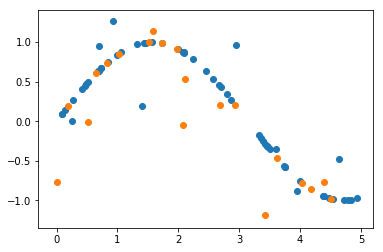

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Example from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
def make_data():
    import numpy as np
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 2 * (0.5 - rng.rand(16))
    return X, y

X, y = make_data()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test);

In [5]:
from sklearn.tree import DecisionTreeRegressor

def regress_wave(max_depth):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X_train, y_train)
    print('Train R^2 score:', tree.score(X_train, y_train))
    print('Test R^2 score:', tree.score(X_test, y_test))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.step(X, tree.predict(X))
    plt.show()

In [6]:
from ipywidgets import interact
interact(regress_wave, max_depth=(1,8,1));

interactive(children=(IntSlider(value=4, description='max_depth', max=8, min=1), Output()), _dom_classes=('wid…

## Classifying a curve

In [7]:
import numpy as np
curve_X = np.random.rand(1000, 2) 
curve_y = np.square(curve_X[:,0]) + np.square(curve_X[:,1]) < 1.0
curve_y = curve_y.astype(int)

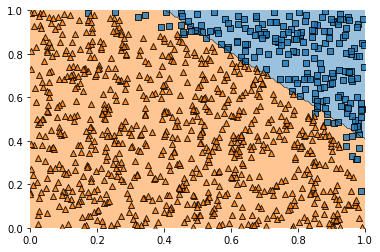

In [9]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='lbfgs')
lr.fit(curve_X, curve_y)
plot_decision_regions(curve_X, curve_y, lr, legend=False)
plt.axis((0,1,0,1));

In [10]:
from sklearn.tree import DecisionTreeClassifier

def classify_curve(max_depth):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(curve_X, curve_y)
    plot_decision_regions(curve_X, curve_y, tree, legend=False)
    plt.axis((0,1,0,1))
    plt.show()

In [11]:
interact(classify_curve, max_depth=(1,8,1));

interactive(children=(IntSlider(value=4, description='max_depth', max=8, min=1), Output()), _dom_classes=('wid…

## Titanic survival, by age & fare

In [12]:
import seaborn as sns
from sklearn.impute import SimpleImputer

titanic = sns.load_dataset('titanic')
imputer = SimpleImputer()
titanic_X = imputer.fit_transform(titanic[['age', 'fare']])
titanic_y = titanic['survived'].values

ModuleNotFoundError: No module named 'sklearn.impute'

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='lbfgs')
lr.fit(titanic_X, titanic_y)
plot_decision_regions(titanic_X, titanic_y, lr, legend=False);
plt.axis((0,75,0,175));

In [ ]:
def classify_titanic(max_depth):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(titanic_X, titanic_y)
    plot_decision_regions(titanic_X, titanic_y, tree, legend=False)
    plt.axis((0,75,0,175))
    plt.show()

In [ ]:
interact(classify_titanic, max_depth=(1,8,1));